Copyright 2020 The Google Research Authors.

Licensed under the Apache License, Version 2.0 (the "License"); You may not use this file except in compliance with the License. You may obtain a copy of the License at

http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pathlib import Path

In [0]:
# dictionary of metrics to plot (each metric is shown in an individual plot)
# dictionary key is name of metric in logs.csv, dict value is label in the final plot
plot_metrics = {'ens_acc': 'Test accuracy',       # Ensemble accuracy
                'ens_ce': 'Test cross entropy'}   # Ensemble cross entropy

# directory of results
# should include 'run_sweeps.csv', generated by run_resnet_experiments.sh/run_resnet_experiments.sh
results_dir = '/tmp/google_research/cold_posterior_bnn/results_resnet/'

In [0]:
# load csv with results of all runs
sweeps_df = pd.read_csv(results_dir+'run_sweeps.csv').set_index('id')

# add final performance of run as columns to sweep_df
for metric in plot_metrics.keys():
  sweeps_df[metric] = [0.] * len(sweeps_df)

for i in range(len(sweeps_df)):
  # get logs of run
  log_dir = sweeps_df.loc[i, 'dir']
  logs_df = pd.read_csv('{}{}/logs.csv'.format(results_dir, log_dir))
  for metric in plot_metrics:
    # get final performace of run and add to df
    idx = 0
    final_metric = float('nan')
    while np.isnan(final_metric):
      idx += 1
      final_metric = logs_df.tail(idx)[metric].values[0] # indexing starts with 1
    sweeps_df.at[i, metric] = final_metric

# save/update csv file
sweeps_df.to_csv(results_dir+'run_sweeps.csv')

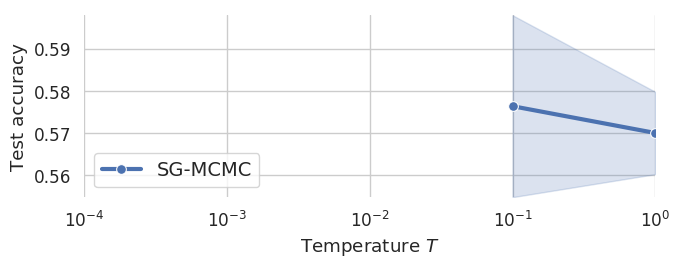

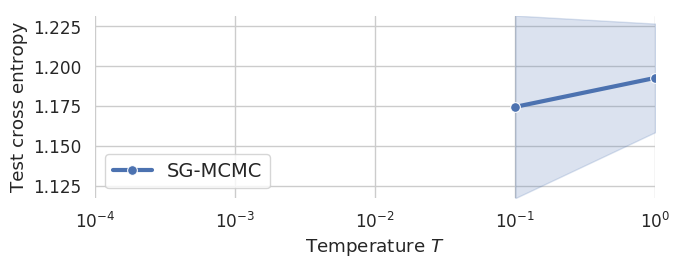

In [0]:
# plot
font_scale = 1.1
line_width = 3
marker_size = 7
cm_lines = sns.color_palette('deep')
cm_points = sns.color_palette('bright')

# style settings
sns.reset_defaults()
sns.set_context("notebook", font_scale=font_scale,
                rc={"lines.linewidth": line_width,
                    "lines.markersize" :marker_size}
                )
sns.set_style("whitegrid")

for metric, metric_label in plot_metrics.items():
  # plot SG-MCMC
  fig, ax = plt.subplots(figsize=(7.0, 2.85))
  g = sns.lineplot(x='temperature', y=metric, data=sweeps_df, marker='o', label='SG-MCMC', color=cm_lines[0], zorder=2, ci='sd')

  # finalize plot
  plt.legend(loc=3, fontsize=14)
  g.set_xscale('log')
  #g.set_ylim(bottom=0.88, top=0.94)
  g.set_xlim(left=1e-4, right=1)
  fig.tight_layout()
  ax.set_frame_on(False)
  ax.set_xlabel('Temperature $T$')
  ax.set_ylabel(metric_label)

  ax.margins(0,0)
  plt.savefig('{}resnet_{}.pdf'.format(results_dir, metric_label),  format="pdf", dpi=300, bbox_inches="tight", pad_inches=0)